In this tutorial we are going to see how to run a regression model in R with different data types as independent variables (continuous and categorical). We will also see how to check the assumptions of such a model, so that we are convinced that it worked as expected. 

For this tutorial, let's import the following dataset (adapted from the main textbook of the course):

In [3]:
tutorial.dat<-read.csv("https://raw.githubusercontent.com/jrasero/cm-85309-2023/main/datasets/parenthood.csv")

This dataset contains four variables: 

- "day": day in the dataset, numbered from 1 to 100, the number of days data were recollected.
- "parent.sleep": The number of hours the parent slept a particular day.
- "baby.sleep": The number of hours the baby slept a particular day.
- "parent.grump": The level of grumpiness of the parent that particular day.

Let's also load, as usual, the **tidyverse** package.

In [4]:
library(tidyverse)

# Linear Regression

Is there a relationship between a parent's level of grumpiness and the amount of sleep they got the previous night?

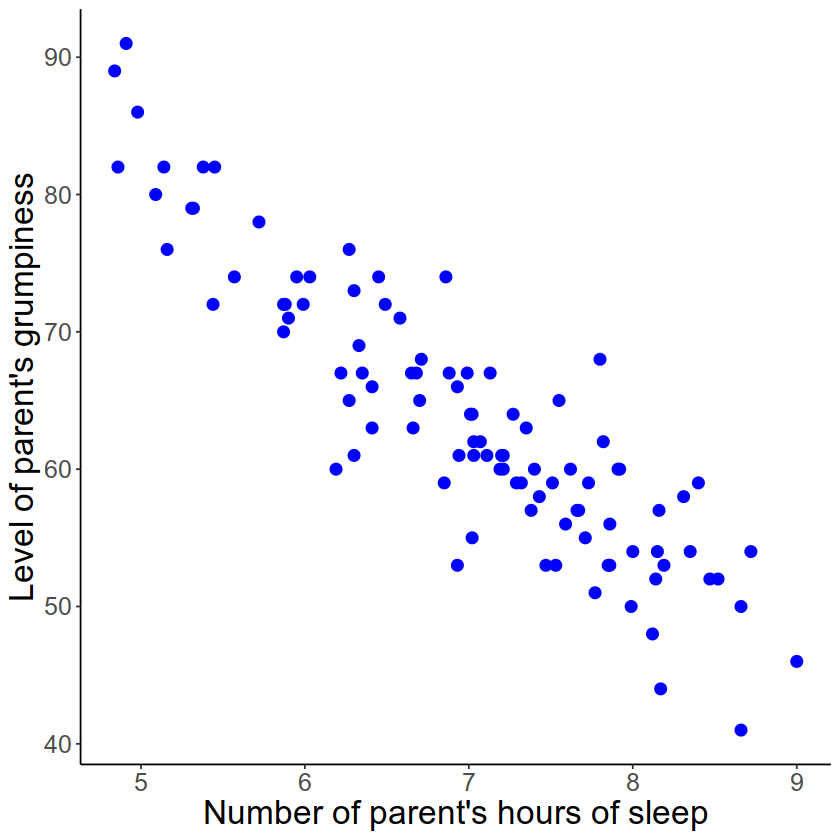

In [5]:
ggplot(data=tutorial.dat, mapping = aes(x=parent.sleep, parent.grump)) + 
geom_point(size=3, color="blue") +
xlab("Number of parent's hours of sleep") +
ylab("Level of parent's grumpiness") + theme_classic() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size=15)) 


There appears to be a clear association between the number of hours of sleep and the level of grumpiness. Is this relationship significant? As we saw previously, we could test this just using a test based on Pearson's correlations by means of `cor.test`.

In [6]:
cor.res<-cor.test(~parent.grump + parent.sleep, data = tutorial.dat)
cor.res


	Pearson's product-moment correlation

data:  parent.grump and parent.sleep
t = -20.854, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9340614 -0.8594714
sample estimates:
      cor 
-0.903384 


So the relationship is clearly significant. It is also negative, indicating that as the parent gets more sleep hours, their grumpiness decreases. And finally, this occurs drastically, given that the correlation between both variables is close to -1.

This is nice and, in many situations, could be sufficient for a particular purpose. However, sometimes we may want to explicitly model the relationship between variables. The simplest way to model this relationship would be with a line:

`geom_smooth()` using formula = 'y ~ x'


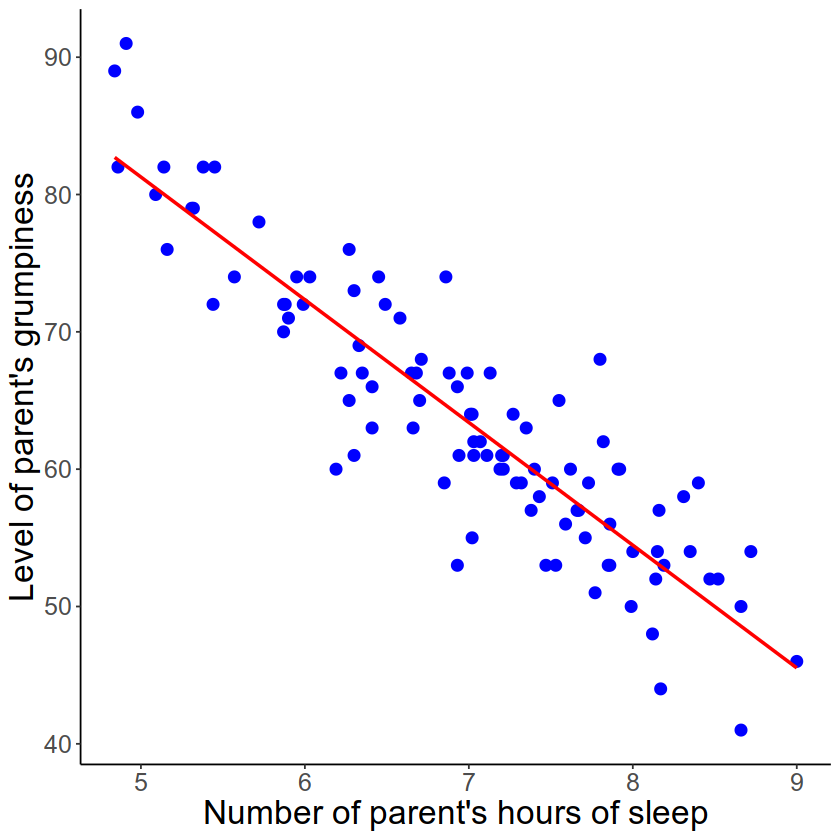

In [7]:
ggplot(data=tutorial.dat, mapping = aes(x=parent.sleep, parent.grump)) + 
geom_point(size=3, color="blue") +
geom_smooth(method = lm, color="red", se = FALSE) +
xlab("Number of parent's hours of sleep") +
ylab("Level of parent's grumpiness") + theme_classic() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size=15)) 

We can model this linear relationship in the above graph using a linear regression model. This model, (and **any** linear model) can be estimated in R using `lm` the built-in function. We just need to specify the dependent variable and the independent variable, and that's it; `lm` takes care of doing the rest:

In [8]:
# quick look at it documentation
?lm

In [9]:
# Print out the arguments of this function
args(lm)

function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
NULL

As we can see, this function takes two arguments: *formula*, which specifies the dependent and indepedent variable(s); and *data*,  which is just the data frame that contains the variables used in *formula*. 

Let's run this function to model the linear relationship plotted above, that is, considering grumpiness as the dependent variable, and the number of the parent's hours slept as the independent variable. We will store the output of running this to a variable named "reg.model.1":

In [10]:
reg.model.1<-lm(formula = parent.grump ~ parent.sleep, data=tutorial.dat)

Let's inspect its output:

In [11]:
print(reg.model.1)


Call:
lm(formula = parent.grump ~ parent.sleep, data = tutorial.dat)

Coefficients:
 (Intercept)  parent.sleep  
     125.956        -8.937  



Nice, so basically this is telling us that the regression line takes the following form:

$$parent.grump = 125.956 - 8.937\cdot {\rm parent.sleep}$$

That is, our intercept is equal to 125.956, and the slope is equal to -8.937.

What do these mean? 

- An intercept equal to 125.956 means that if the number of hours slept by the parent is 0, their grumpiness level is expected to be 125.956 (for comparison, the parent has an average grumpiness level of 63.71!).

- A slope equal to -8.937 means that for each hour of sleep the parent gets, their grumpiness decreases by 8.937 levels.

As usual and like with other R functions, any time we run this function, we generate a bunch of output:

In [12]:
names(reg.model.1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [13]:
# E.g. estimated beta coefficients
coefficients(reg.model.1)

(Intercept) parent.sleep 
  125.956292    -8.936756

But wait... where are the p-values of the entire model and of the estimated coefficients? Similar to `aov`, in order to obtain this information, we need to pass our estimated model to the `summary` function:

In [14]:
reg.model.1.summary<-summary(reg.model.1)
reg.model.1.summary


Call:
lm(formula = parent.grump ~ parent.sleep, data = tutorial.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.025  -2.213  -0.399   2.681  11.750 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.9563     3.0161   41.76   <2e-16 ***
parent.sleep  -8.9368     0.4285  -20.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.332 on 98 degrees of freedom
Multiple R-squared:  0.8161,	Adjusted R-squared:  0.8142 
F-statistic: 434.9 on 1 and 98 DF,  p-value: < 2.2e-16


This function gives other stuff as output:

In [15]:
names(reg.model.1.summary)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

Among all the different output, we can access the coefficient of determination, $R^2$, the adjusted coefficient of determination, the F-statistic, and a *coefficients* variable. Let's have a closer look at this last variable:

In [16]:
reg.model.1.summary$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),125.956292,3.0160692,41.76174,3.070709e-64
parent.sleep,-8.936756,0.4285309,-20.85440,8.176426e-38


As we can see, this variable contains the estimated regression coefficients, their standard errors, the t-values, and the associated p-values.

<div class="alert alert-info"> <b>Question</b>: Extract the t-statistic and p-value from running `cor.test` and compare them with the t-statistic and p-value for the "parent.sleep" variable above by running `lm`. They should be identical. Why do you think that is?"

# Multiple Linear Regression

The previous linear regression model assumed a single independent variable, "parent.sleep", which is the number of hours slept by the parent. But what if there are other variables that could also contribute to the grumpiness of the parent? We can attempt to assess this by using a multiple linear regression, which is simply a linear regression with more than one independent variable.

Let's add "baby.sleep", which is the number of hours slept by the baby, to the previous regression model. This can be easily accomplished by adding the aforementioned variable to the right side of the formula object in `lm`: 

In [17]:
reg.model.2<-lm(formula = parent.grump ~ parent.sleep + baby.sleep, data=tutorial.dat)

In [18]:
print( reg.model.2 )


Call:
lm(formula = parent.grump ~ parent.sleep + baby.sleep, data = tutorial.dat)

Coefficients:
 (Intercept)  parent.sleep    baby.sleep  
   125.96557      -8.95025       0.01052  



As we can see, the coefficient associated with the number of hours slept by the parent is still large. However, the coefficient for "baby.sleep" is very small, suggesting that the amount of sleep the baby gets does not really matter. What really contributes to the parent's grumpiness is the amount of sleep the parent gets.

<div class="alert alert-info"> <b>Practice question</b>: Create a new variable in the data frame of this tutorial, defined as the values of "baby.sleep" divided by 1000. Name this variable "baby.sleep.2", for example. Now rerun the multiple regression model again but replacing "baby.sleep" with "baby.sleep.2". 
    
- The associated $\beta$ coefficient for this new variable should be larger that the one associated with "baby.sleep". Does that mean that "baby.sleep.2" is more important to the parent's grumpiness than "baby.sleep"? 
- Similarly, now this $\beta$ is greater than the $\beta$ of "parent.sleep". Does that mean that in this case the number of hours slept by the parent is less important?
- What is wrong here?

In [2]:
# Run your code here

Like before, in order to be able to inspect the p-values of the entire model and of each independent variable, we need to make use of `summary`:

In [19]:
reg.model.2.summary<-summary( reg.model.2 )
print(reg.model.2.summary)


Call:
lm(formula = parent.grump ~ parent.sleep + baby.sleep, data = tutorial.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0345  -2.2198  -0.4016   2.6775  11.7496 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.96557    3.04095  41.423   <2e-16 ***
parent.sleep  -8.95025    0.55346 -16.172   <2e-16 ***
baby.sleep     0.01052    0.27106   0.039    0.969    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.354 on 97 degrees of freedom
Multiple R-squared:  0.8161,	Adjusted R-squared:  0.8123 
F-statistic: 215.2 on 2 and 97 DF,  p-value: < 2.2e-16



As we can see, running this function on our regression object gives us several outputs:

In [20]:
names(reg.model.2.summary)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

One particularly important output has to do with the residuals. We can access this information by printing out the summary object or by using the residuals variable in that same object, as follows:

In [21]:
summary(reg.model.2.summary$residuals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-11.0345  -2.2198  -0.4016   0.0000   2.6775  11.7496 

This output allows us to quickly check if the model is okay in terms of one of the assumptions of regression: that the residuals should be normally distributed with a mean of zero. Here, we see that the median is close to zero and the first and third quartiles are similar, indicating that normality is being satisfied (we'll come back to this in a more thorough way later though). 

A second important information is the part regarding the coefficients of the regression model. Let's inspect this accessing the variable "coefficients" in the summary object of our regression model:

In [22]:
reg.model.2.summary$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),125.96556586,3.0409482,41.42312073,1.764888e-63
parent.sleep,-8.95024973,0.5534577,-16.17151638,2.747754e-29
baby.sleep,0.01052447,0.2710637,0.03882656,9.691085e-01


Each row in this table refers to one of the coefficients in the regression model, with the first row being the
intercept term, and the rest each of the independent varibles. 

Each column in this table gives us a particular information about each regression coefficient. The first column gives us the actual estimate, the second one gives uus the standard error of the estimate, the third column the t-statistic (i.e. the estimate/standard error), and the fourth column the p-value (without any correction; remember that this is like a post-hoc analys and therefore, we may need to adjust for testing multiple times...).

We can also access the performance of the model, $R^2$, the adjusted performance and the F-statistic for the entire model:

In [23]:
reg.model.2.summary$r.squared # R2
reg.model.2.summary$adj.r.squared  # adjusted R2
reg.model.2.summary$fstatistic  # F-statistic

[1] 0.8161056

[1] 0.8123139

value    numdf    dendf 
215.2383   2.0000  97.0000

<div class="alert alert-info"> <b>Practice question</b>: Compute the F-statistic and the p-value for the entire model explicitly. For this, you will need to first compute $SS_{res}$, defined as $SS_{res}=\sum_{i=1}^N(Y_i - \hat{Y}_i)^2$, and $SS_{tot}$, defined as  $SS_{tot}= \sum_{i=1}^N(Y_i - <Y>)^2$. (Hint: you can get $\hat{Y}$ as the "fitted.values" in our regression model object, i.e. the one from running <code>lm</code> and that we have passed to <code>summary</code>.)

In [3]:
# Run your code here

## Confidence intervals

The final thing we can try to calculate is the **confidence intervals** for our $\beta$ estimates. These are not directly calculated when we run the regression model; instead, we may use the `confint` R built-in function:

In [25]:
?confint
args(confint)

function (object, parm, level = 0.95, ...) 
NULL

The only thing that we need to do is to pass the object containing the estimation of our regression model (i.e. the resulting object from using `lm`), and specify  the level of confidence interval.

In [26]:
confint( object = reg.model.2,level = .95)

,2.5 %,97.5 %
(Intercept),119.930125,132.0010063
parent.sleep,-10.048710,-7.8517895
baby.sleep,-0.527462,0.5485109


This will give us the confidence intervals for all the coefficients of our model. Alternatively, we could specify a subset of coefficients as well:

In [27]:
confint( object = reg.model.2, parm = c("parent.sleep","baby.sleep"), level = .95)

,2.5 %,97.5 %
parent.sleep,-10.048710,-7.8517895
baby.sleep,-0.527462,0.5485109


As we can see, at the 95% confidence level, the coefficient for parent.sleep does not include the value of zero, whereas the coefficient for baby.sleep does include it. That's why the former was found to be significant at this significance level, while the latter was not...

## Working with categorical data

Many variables of interest are usually categorical, such as gender, race, or personality type. In order to include these variables in a regression model, they must first be transformed into numerical variables. Dummy variable encoding is one of the different techniques used to achieve this transformation.

Dummy variables take on a value of 0 or 1, indicating whether the observation belongs to a particular category or not. By including these dummy variables in the regression model, we can estimate the effect of each category on the dependent variable. 

Importantly, when creating dummy variables from a categorical variable, one of the categories need to be a BASELINE. The baseline category is the category against which all other categories are compared. Whenever we work with categorical variables in regression models, we need a baseline so that we can quantify how a change between categories is expected to affect the dependent variable. Similarly, a baseline is needed when having an intercept, since this cofficient captures the variability of Y when all X are equal to 0. A value 0 in the categorical variables needs to correspond to one particular category, which would be the baseline.

In R, this is done automatically when including categorical variable in the regression model. 

Let's see this by creating a categorical variable in our dataset, "day.cat", corresponding to discretizing in 4 categories the days each observation was measured.

In [29]:
tutorial.dat.cat<-tutorial.dat %>% mutate(day.cat = cut(day, breaks = c(0, 25, 50, 75, 100), 
                                                        labels = c("t0", "t1", "t2", "t3")))

head(tutorial.dat.cat)
table(tutorial.dat.cat$day.cat)

,parent.sleep,baby.sleep,parent.grump,day,day.cat
,<dbl>,<dbl>,<int>,<int>,<fct>
1,7.59,10.18,56,1,t0
2,7.91,11.66,60,2,t0
3,5.14,7.92,82,3,t0
4,7.71,9.61,55,4,t0
5,6.68,9.75,67,5,t0
6,5.99,5.04,72,6,t0



t0 t1 t2 t3 
25 25 25 25 

And see what hapeens when we include "day.cat" as an independent variablem in the regression model:

In [30]:
reg.model.cat<-lm(parent.grump~parent.sleep + baby.sleep + day.cat, 
                  data=tutorial.dat.cat)

In [31]:
reg.model.cat


Call:
lm(formula = parent.grump ~ parent.sleep + baby.sleep + day.cat, 
    data = tutorial.dat.cat)

Coefficients:
 (Intercept)  parent.sleep    baby.sleep     day.catt1     day.catt2  
   126.10800      -8.83376      -0.04098      -1.53248      -0.26295  
   day.catt3  
    -0.36150  


Now we have an estimated cofficient for every single category but one, because as we said, one of the categories is always used as a baseline. 

If we pass this estimated regression object, we can get the p-values for each coefficient:

In [32]:
summary( reg.model.cat )


Call:
lm(formula = parent.grump ~ parent.sleep + baby.sleep + day.cat, 
    data = tutorial.dat.cat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1618  -2.5089  -0.4761   2.7700  11.5339 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  126.10800    3.20003  39.408   <2e-16 ***
parent.sleep  -8.83376    0.57152 -15.457   <2e-16 ***
baby.sleep    -0.04098    0.27685  -0.148    0.883    
day.catt1     -1.53248    1.24901  -1.227    0.223    
day.catt2     -0.26295    1.24625  -0.211    0.833    
day.catt3     -0.36150    1.24662  -0.290    0.772    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.382 on 94 degrees of freedom
Multiple R-squared:  0.8195,	Adjusted R-squared:  0.8099 
F-statistic: 85.34 on 5 and 94 DF,  p-value: < 2.2e-16


Looking at these p-values, there appear to be no statistical differences in grumpiness between different day epochs.

# CHECKING OUR REGRESSION MODEL


Ok, so we've just seen how to estimate our regression model and make inferences on it. But were we correct in using such a model to describe the relationship between our dependent variable and the independent variables? We need to make sure that the assumptions of the regression model are satisfied to a certain degree. Let's have a look at how to check this in R:

## 1. Linearity

The first thing we can check is whether there exists a linear relation between the independent variables and dependent variable. We will address this assumption using a *Residuals vs Fitted* plot, such that if the residuals are uniformly distributed around a horizontal line with no noticeable patterns, this suggests a strong possibility of a linear relationship.

In R we can accomplish this just by passing our regression model object to the `plot` function and setting the argument "which" equal 1:

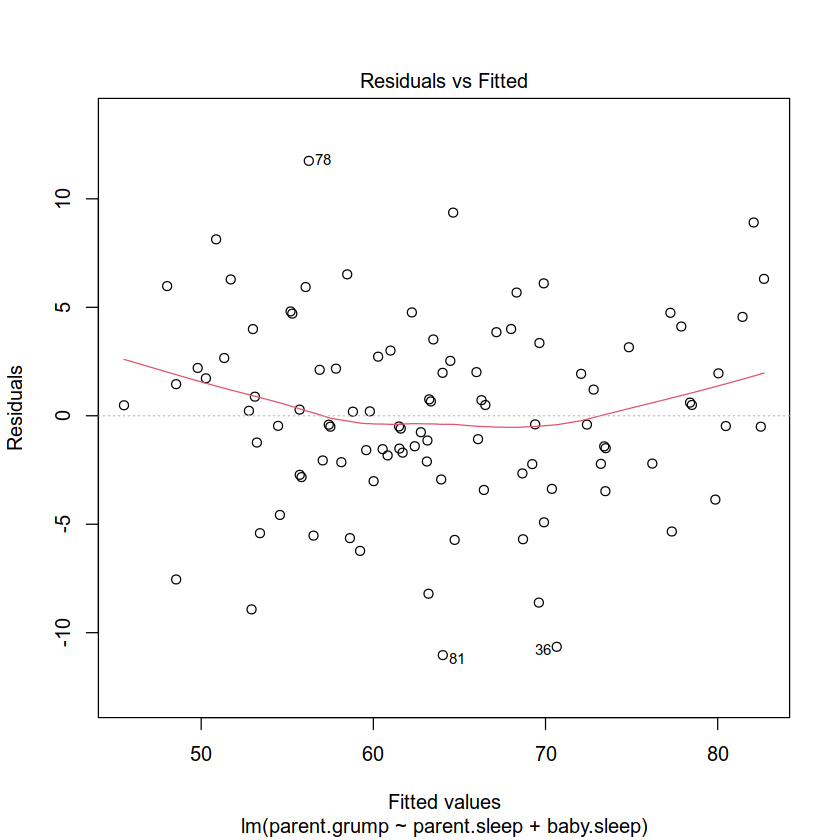

In [33]:
plot(reg.model.2, which=1)

As we can see, this plot not only does draws the scatter plot showing the fitted value against the residuals, but also a line that shows the relationship between the fitted values and the residuals. Ideally, this relationship should be a straight, perfectly horizontal line. Here we see a bit of curvature, but it seems quite mild, so we should worry too much about it.

## 2. Normality of the residuals

We saw in previous tutorials how to test the normality of the data. Here we should apply that knowledge to the **residuals**. Remember that we can always get the residuals in our regression model object by accessing its variable named "residuals".

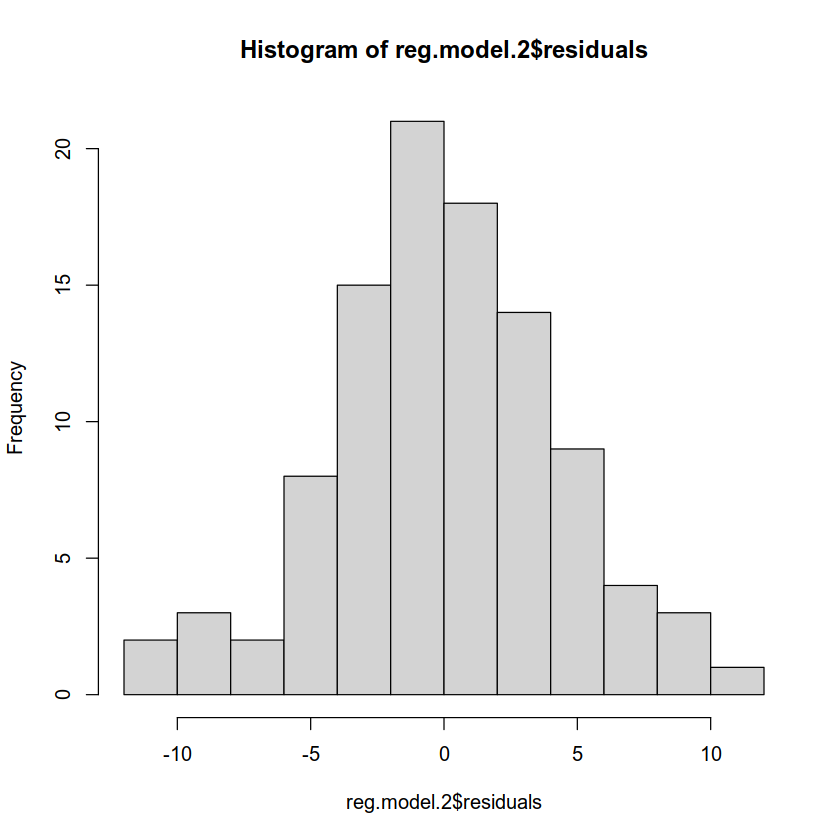

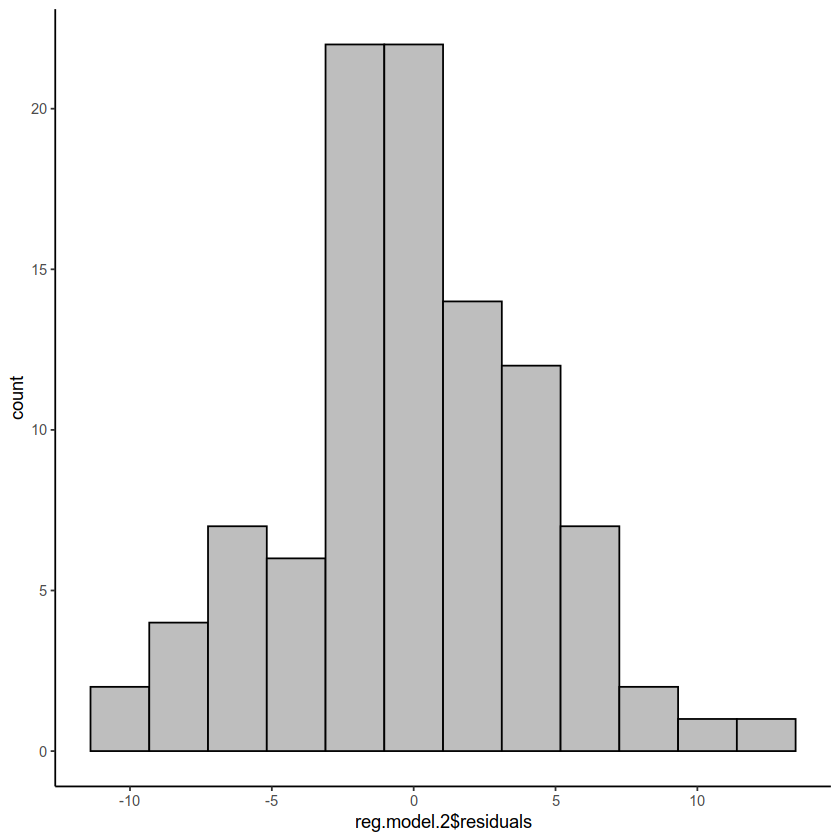

In [34]:
# Visually using histograms
hist(x=reg.model.2$residuals, breaks=10)
ggplot() + geom_histogram(mapping = aes(x=reg.model.2$residuals), bins=12, color='black',fill="grey") + theme_classic()

We can more efficiently look at this by making a Q-Q plot. We could use **ggplot** as we studied, or more quickly using the `plot` function and setting the argument "which" equal 2:

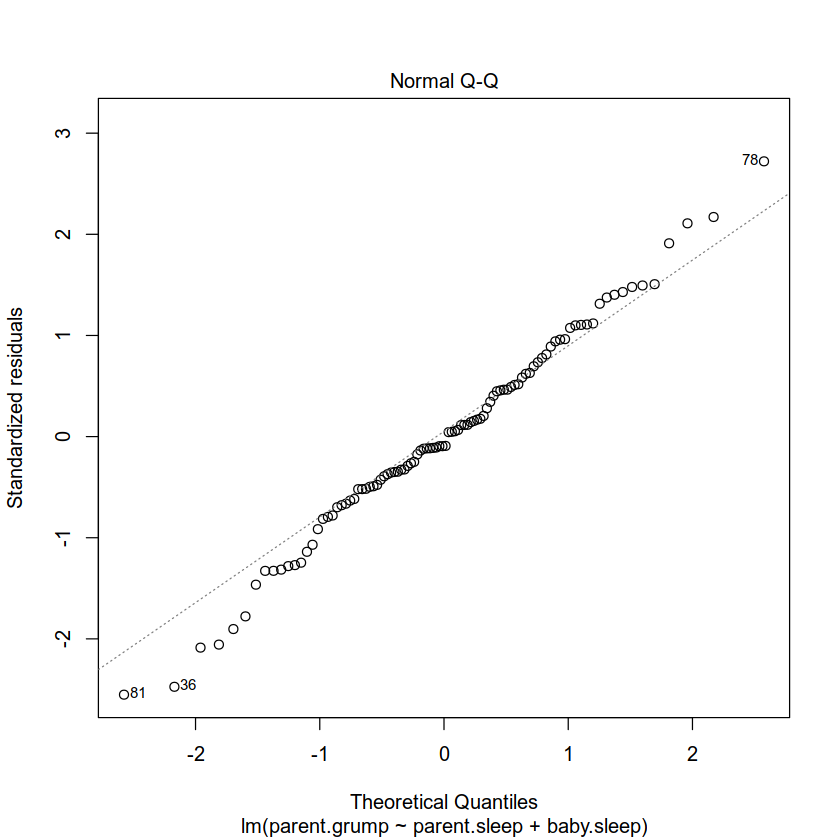

In [35]:
plot(reg.model.2, which=2)

As we can see, residuals appear to follow a gaussian distribution. To be even more sure, we could try to address this statistically by running a Shapiro-Wilk test:

In [36]:
# Statistically
shapiro.test(reg.model.2$residuals)


	Shapiro-Wilk normality test

data:  reg.model.2$residuals
W = 0.99228, p-value = 0.8414


So yeah, as we suspected, our regression model appears to satisfy the condition on normality of the residulas.

## 3. Varience homogeneity of the residuals

Here again we turn our attention to the residuals to see if their variance are more or less constant. In order to check this condition, we will utilize a *Scale-Location* plot, also known as a spread-location plot, which displays the square root of the absolute standardized residuals (or studentized residuals) against the fitted values of the dependent variable. If the variance of the residuals is constant across all fitted values, the points in the plot will be randomly scattered around a horizontal line at a constant distance from zero. However, if there is a pattern or trend in the plot, it may suggest that the variance of the residuals is not constant, and that the assumptions of homogeneit of variance (also called homoscedasticity) may have been violated.

In R, this kind of plots can be easily achieved using the `plot` function and setting the argument "which" equal 3:

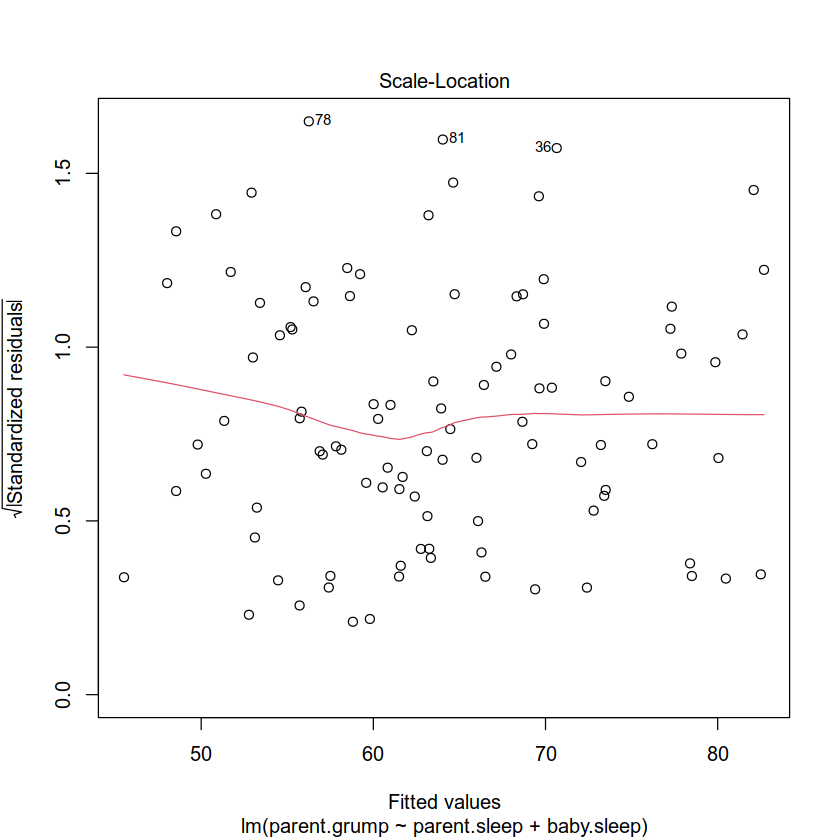

In [37]:
plot(reg.model.2, which=3)

As we can see here, our line is almost straight and flat, suggesting that indeed our residuals have a constant variance.

## 4. No extreme outliers

Here we have two options to check this condition. The first one involves making use of the so-called *Cook's distance*, which is a measure of the influence of individual data points on the regression coefficients in a regression model. It calculates the change in the regression coefficients when a particular observation is deleted from the dataset, so it measures how much the regression coefficients would change if the observation were to be excluded from the analysis. A large value of Cook's distance for a given observation suggests that the observation has a large influence on the regression coefficients and may be an outlier or influential point that should be examined more closely. Cook's distance values range from 0 to 1, with larger values indicating greater influence of the observation on the regression coefficients. Generally, a threshold value of 1 is used to identify influential observations.


In R, we can generate a plot for the Cook's distances of each observation by means of the `plot` function and setting the argument "which" equal 4:

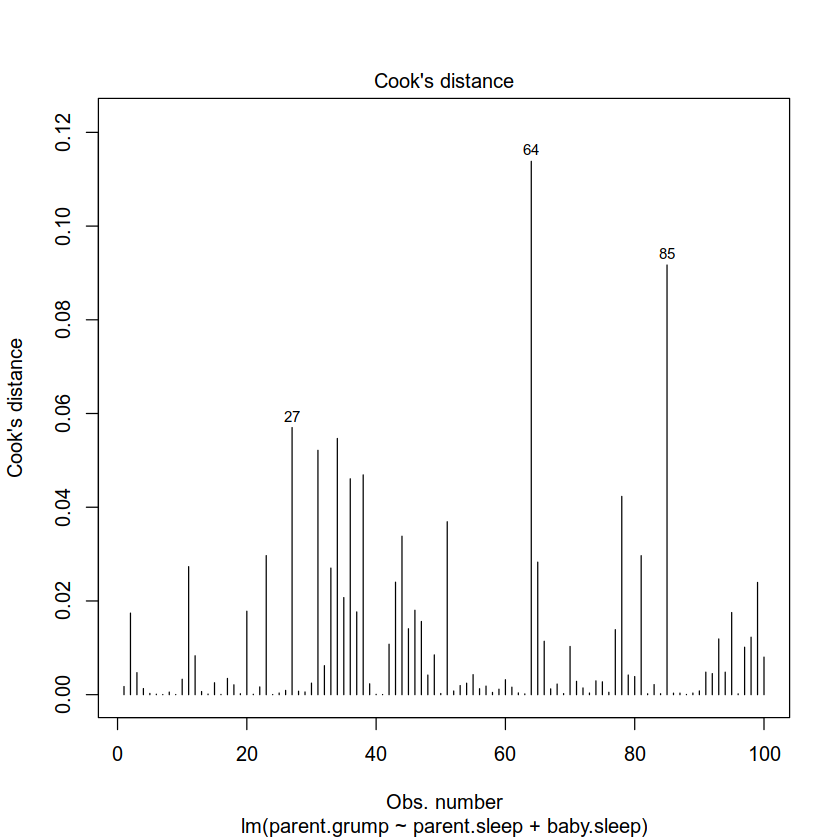

In [38]:
plot(reg.model.2, which=4)

And alternative method for identifying outliers is by means of a *Residuals vs Leverage* plot, which displays the standardized residuals (or studentized residuals) against the leverage values of the observations. Leverage values are a measure of how much an observation deviates from the average value of the predictor variables. 

Large leverage observations are those that have extreme values on one or more predictor variables. In general, observations with large leverage values and large residuals are of greater concern because they have the potential to exert a strong influence on the regression coefficients. If an observation has both a large leverage value and a large residual, it can be considered an influential point that should be examined more closely. Conversely, if an observation has a low leverage value and a small residual, it can be considered a low-influence point that is unlikely to have a significant impact on the regression coefficients.

In R we can plot this by means of the `plot` function and setting the argument "which" equal 5:

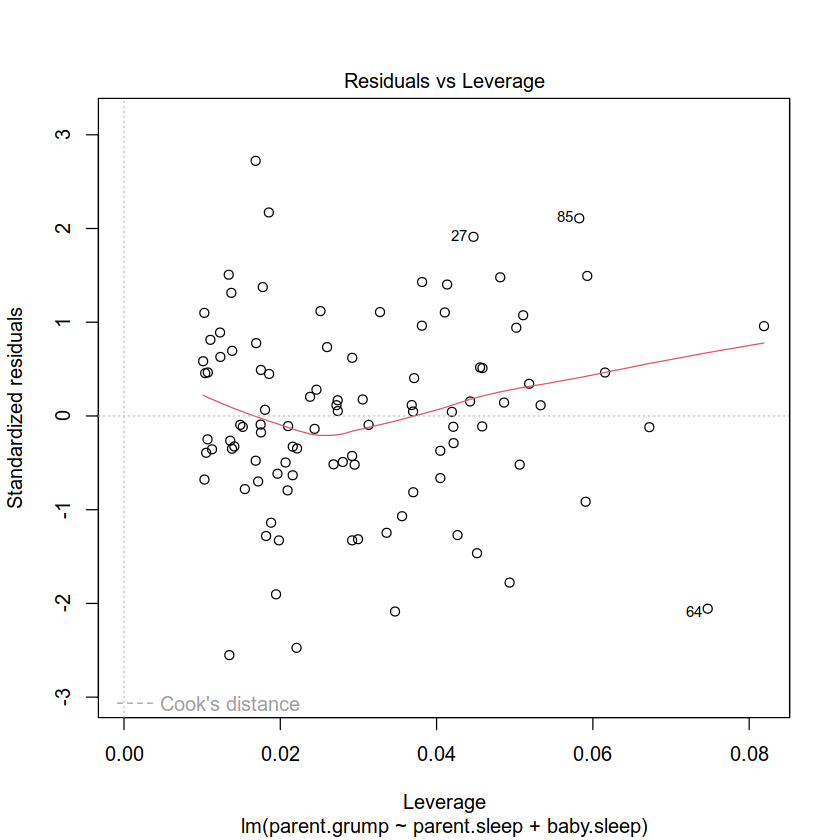

In [39]:
plot(reg.model.2, which=5)

As we can see, both plots suggest a few points as possible outliers. Are these so? The quickets way of checking this is by running the regression with every outlier candidate excluded and see what happens to the model performance and to the regression coefficients. If they really are substantially different, we may to need to take that observation into further consideration. If we believe this observation was not supposed to be there and is badly distorting our results, we might consider excluding it.

How can we rerun our regression models excluding a particular observation? Well, the `lm` function has the argument "subset" that allows us to do that. Let's see this, separately, for the points 64 and 85 of our dataset:

In [41]:
lm( formula = parent.grump ~ parent.sleep + baby.sleep, # same formula
data = tutorial.dat, # same data frame...
subset = -64)

lm( formula = parent.grump ~ parent.sleep + baby.sleep, # same formula
data = tutorial.dat, # same data frame...
subset = -85)


Call:
lm(formula = parent.grump ~ parent.sleep + baby.sleep, data = tutorial.dat, 
    subset = -64)

Coefficients:
 (Intercept)  parent.sleep    baby.sleep  
    126.3553       -8.8283       -0.1319  



Call:
lm(formula = parent.grump ~ parent.sleep + baby.sleep, data = tutorial.dat, 
    subset = -85)

Coefficients:
 (Intercept)  parent.sleep    baby.sleep  
   124.50234      -8.69714      -0.03846  


As we can see, in both cases the regression coefficients barely change in comparison to the values using the full dataset, so we can infer that these points are no problem.

## 5- Independent residuals

To check this assumption, we will create an ACF plot, which a commonly used diagnostic tool to check for correlations between residuals (i.e. also known as autocorrelations) in regression analysis. An autocorrelation is a measure of the degree of similarity between a series of observations and a delayed version of itself. In the case of the residuals, if these are independent, then the autocorrelation coefficients should not be significantly different from zero for all lags. On the other hand, if there is significant autocorrelation in the residuals, it suggests that there is still some pattern or structure in the data that is not captured by the regression model. This can result in biased or inefficient parameter estimates and can affect the accuracy and reliability of the model's predictions.

An ACF plot to test the independence of the residuals is created by plotting the residuals against their own lagged values. If the ACF plot shows that the autocorrelation coefficients are not significantly different from zero for all lags, then it suggests that the residuals are independent and that the regression model is appropriate for the data. However, if there are significant autocorrelation coefficients at certain lags, then this suggests that the residuals are not independent and that the regression model may need to be revised or improved.

In R, this kind of plots can be generated using the `acf` function as follows:

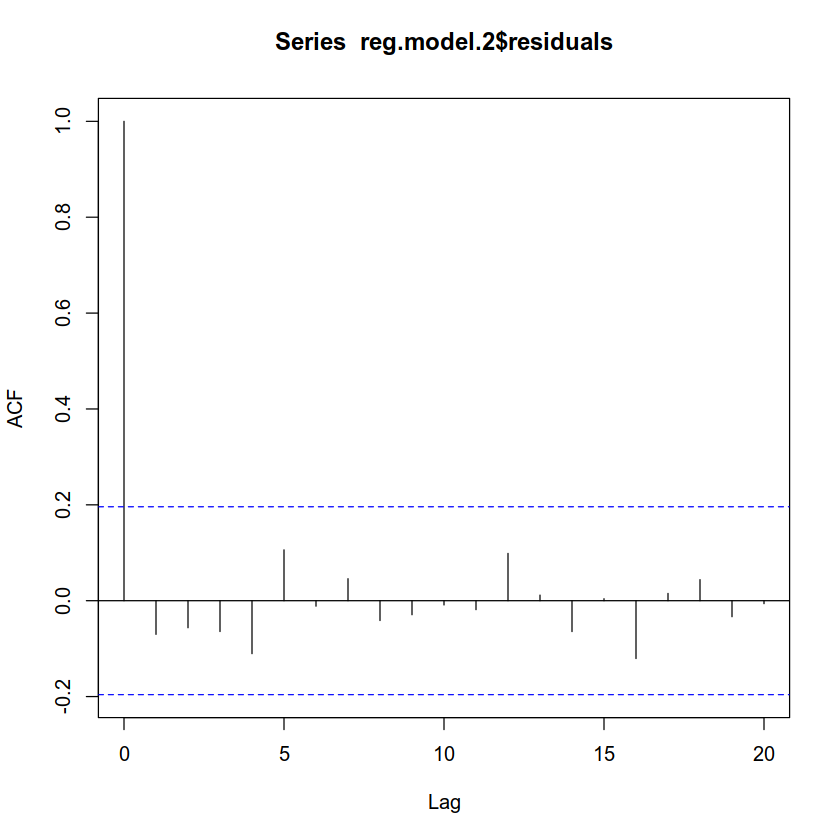

In [49]:
acf(reg.model.2$residuals, type = "correlation")

We need to omit the first value in this graph (Lag=0) because it corresponds to the correlation of each variable with itself, which is always 1. As we can see in this plot, all autocorrelations from the residuals are small, indicating independence between them.

# 6- No collinearity between the independent variables

Maybe here the easiest way would be to compute the correlation matrix of the independent variables and search for large correlations between pairs of variables. This may indicate collinearity. How large? We would probably be talking about correlations of the order of 0.7 or greater. 

In order to calculate this matrix, we can use the `cor` function:

In [40]:
# Just dropping the dependent variable
cor(tutorial.dat %>% select(!parent.grump))

,parent.sleep,baby.sleep,day
parent.sleep,1.00000000,0.62794934,-0.09840768
baby.sleep,0.62794934,1.00000000,-0.01043394
day,-0.09840768,-0.01043394,1.00000000


As we can see, the variables "baby.sleep" and "parent.sleep" are correlated, but not at the level of being super super large, so we could assume that collinearity is not a problem here.

Let's see a case where this might indeed be a problem. As we saw before, the amount of time slept by the parent, i.e. "parent.sleep", is highly associated with their grumpiness, i.e. "parent.grump". In fact, there was a really large correlation between them:

In [41]:
cor.test(tutorial.dat$parent.sleep, tutorial.dat$parent.grump)


	Pearson's product-moment correlation

data:  tutorial.dat$parent.sleep and tutorial.dat$parent.grump
t = -20.854, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9340614 -0.8594714
sample estimates:
      cor 
-0.903384 


What happens if we use these two highly correlated variables as independent variables in the same model? Let's see what happens if we do this:

In [42]:
summary(lm(baby.sleep ~ parent.sleep + parent.grump, data=tutorial.dat))


Call:
lm(formula = baby.sleep ~ parent.sleep + parent.grump, data = tutorial.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9335 -1.3232 -0.0077  1.0108  4.2341 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.067200   4.923129  -0.217 0.828841    
parent.sleep  1.295343   0.376234   3.443 0.000851 ***
parent.grump  0.001477   0.038032   0.039 0.969108    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.631 on 97 degrees of freedom
Multiple R-squared:  0.3943,	Adjusted R-squared:  0.3818 
F-statistic: 31.58 on 2 and 97 DF,  p-value: 2.744e-11


Now, let's run the same model but replacing "parent.grump" with the variable "day", which was not correlated with the amount of time slept by the parent.

In [43]:
summary(lm(baby.sleep ~ parent.sleep + day, data=tutorial.dat))


Call:
lm(formula = baby.sleep ~ parent.sleep + day, data = tutorial.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9894 -1.2543 -0.0376  1.0945  4.3915 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.141046   1.200576  -0.950    0.344    
parent.sleep  1.292567   0.161772   7.990 2.82e-12 ***
day           0.003708   0.005665   0.655    0.514    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.627 on 97 degrees of freedom
Multiple R-squared:  0.397,	Adjusted R-squared:  0.3846 
F-statistic: 31.93 on 2 and 97 DF,  p-value: 2.218e-11


As we can see, and turning our attention exclusively to the variable "parent.sleep", in both cases the estimated $\beta$ coefficient for this variable is the same. What happens is that in the presence of collinearity, errors tend to be large, which is not a good idea both for inference, and for the stability of the model.

**IMPORTANT:** In this section on checking the assumptions of the regression model, I tried to stick to methods that employ only R built-in functions. There are tons of packages that could allow you to investigate this question in a more thorough detail. For example, you could check the **car** and **lmtest** packages out. These provide you , among other things, with a non-constant variance test for checking statistically the homogeneity of variance of the residuals, a measure of collinearity called "Variance Inflation Factor" (VIF) and an implementation of the Durbin Watson Test for addressing statistically the possible dependence between residuals. You should definetely check all this out in the main textbook of the course, or on the internet for example.